In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
!pip install cartopy
import cartopy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 38.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102754 sha256=076683bf4de84ef6a89d45d7bd966e2f56ee845be0aa29b646d23ae6d26f2f95
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers


In [ ]:
import os
import pickle


In [ ]:
print (os.listdir("/content/drive/MyDrive/Datasets/spider/Test"))

['spid (5).JPG', 'spid (14).JPG', 'spid (13).JPG', 'spid (11).JPG', 'spid (7).JPG', 'spid (9).JPG', 'spid (3).JPG', 'spid (8).JPG', 'spid (12).JPG', 'spid (4).JPG', 'spid (6).JPG', 'spid (10).JPG', 'spid (15).JPG', 'spid (1).JPG', 'spid (2).JPG', 'MNIST']


In [ ]:
class ZeroShotCNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ZeroShotCNN, self).__init__()

        self.conv1 = nn.Conv2d(input_dim, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(7 * 7 * 32, 64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = x.view(-1, 7 * 7 * 32)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

In [ ]:
def test(model, test_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='/content/drive/MyDrive/Datasets/spider/Test', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/Datasets/spider/Test', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ZeroShotCNN(input_dim=1, num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_acc = test(model, test_loader, criterion, device)
    print('Epoch: {} | Train Loss: {:.4f} | Test Acc: {:.4f}'.format(epoch+1, train_loss, test_acc))

Epoch: 1 | Train Loss: 0.1343 | Test Acc: 0.9848
Epoch: 2 | Train Loss: 0.0523 | Test Acc: 0.9842
Epoch: 3 | Train Loss: 0.0385 | Test Acc: 0.9857
Epoch: 4 | Train Loss: 0.0307 | Test Acc: 0.9880
Epoch: 5 | Train Loss: 0.0263 | Test Acc: 0.9850
Epoch: 6 | Train Loss: 0.0208 | Test Acc: 0.9917
Epoch: 7 | Train Loss: 0.0169 | Test Acc: 0.9853
Epoch: 8 | Train Loss: 0.0159 | Test Acc: 0.9900
Epoch: 9 | Train Loss: 0.0131 | Test Acc: 0.9887
Epoch: 10 | Train Loss: 0.0125 | Test Acc: 0.9893
Epoch: 11 | Train Loss: 0.0091 | Test Acc: 0.9889
Epoch: 12 | Train Loss: 0.0081 | Test Acc: 0.9895
Epoch: 13 | Train Loss: 0.0103 | Test Acc: 0.9913
Epoch: 14 | Train Loss: 0.0070 | Test Acc: 0.9874
Epoch: 15 | Train Loss: 0.0064 | Test Acc: 0.9910
Epoch: 16 | Train Loss: 0.0067 | Test Acc: 0.9896
Epoch: 17 | Train Loss: 0.0051 | Test Acc: 0.9901
Epoch: 18 | Train Loss: 0.0061 | Test Acc: 0.9900
Epoch: 19 | Train Loss: 0.0037 | Test Acc: 0.9888
Epoch: 20 | Train Loss: 0.0039 | Test Acc: 0.9929
Epoch: 21

In [ ]:
#average accuracy 0.98722 i.e. 98.72%

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
class ZeroShotCNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ZeroShotCNN, self).__init__()

        self.conv1 = nn.Conv2d(input_dim, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(7 * 7 * 32, 64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = x.view(-1, 7 * 7 * 32)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)


def test(model, test_loader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

Epoch: 1 | Train Loss: 0.1430 | Test Acc: 0.9801


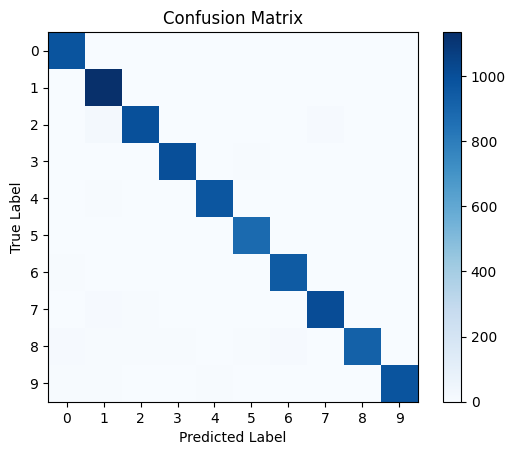

Epoch: 2 | Train Loss: 0.0506 | Test Acc: 0.9844


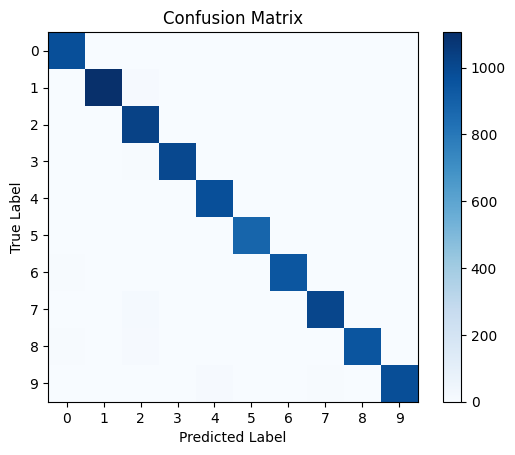

Epoch: 3 | Train Loss: 0.0388 | Test Acc: 0.9856


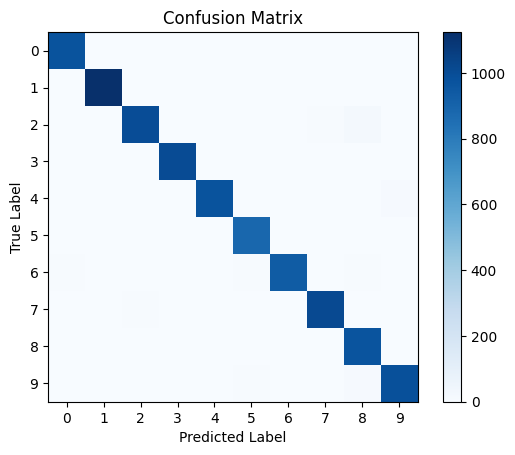

Epoch: 4 | Train Loss: 0.0319 | Test Acc: 0.9879


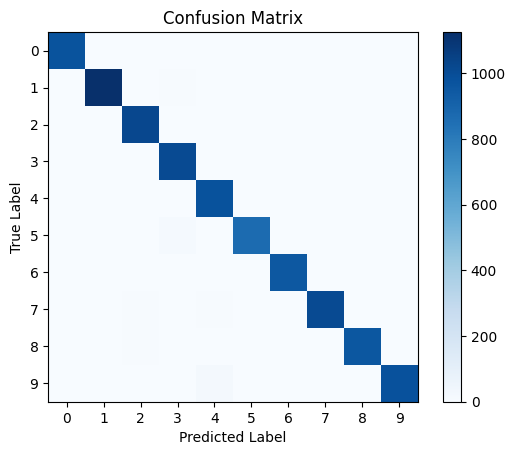

Epoch: 5 | Train Loss: 0.0251 | Test Acc: 0.9890


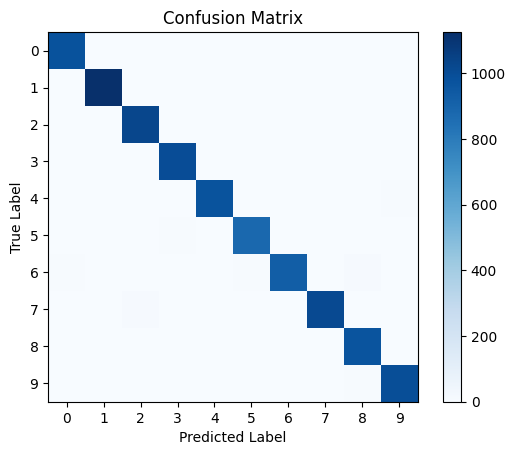

Epoch: 6 | Train Loss: 0.0202 | Test Acc: 0.9892


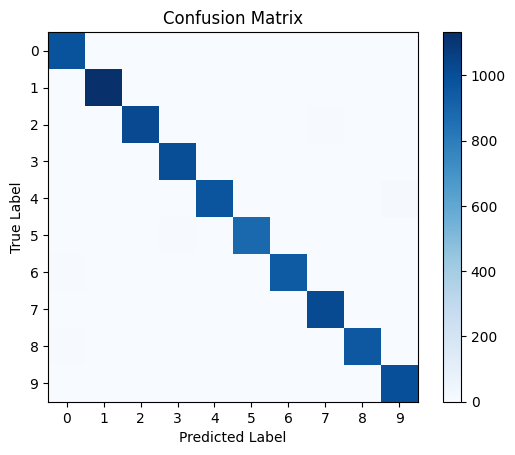

Epoch: 7 | Train Loss: 0.0197 | Test Acc: 0.9891


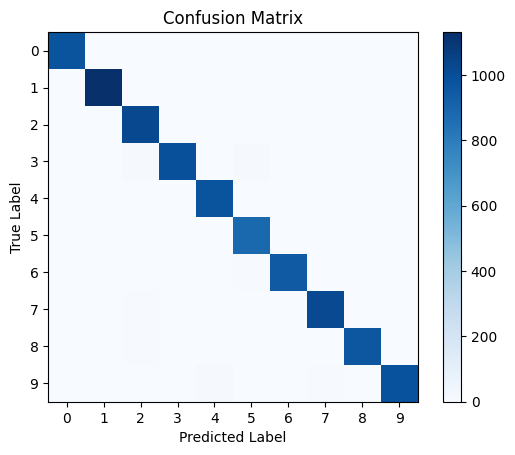

Epoch: 8 | Train Loss: 0.0143 | Test Acc: 0.9903


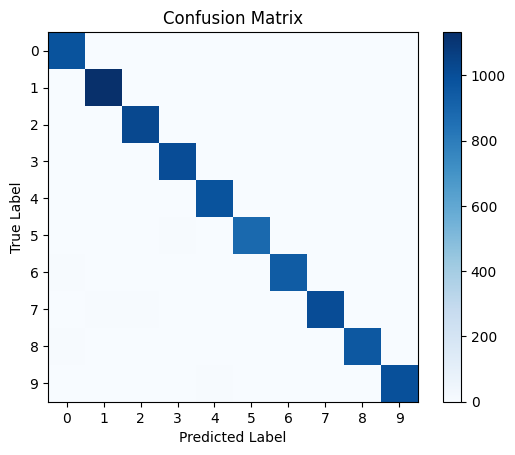

Epoch: 9 | Train Loss: 0.0119 | Test Acc: 0.9894


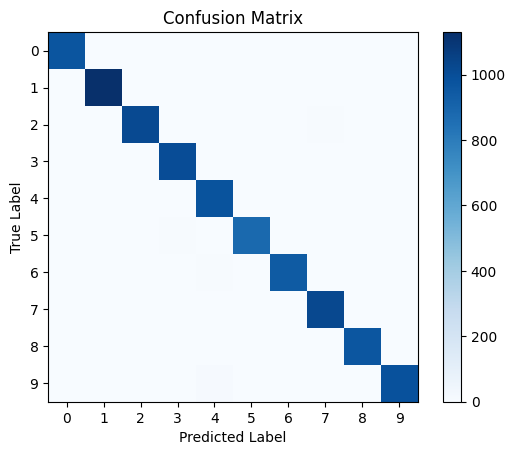

Epoch: 10 | Train Loss: 0.0109 | Test Acc: 0.9876


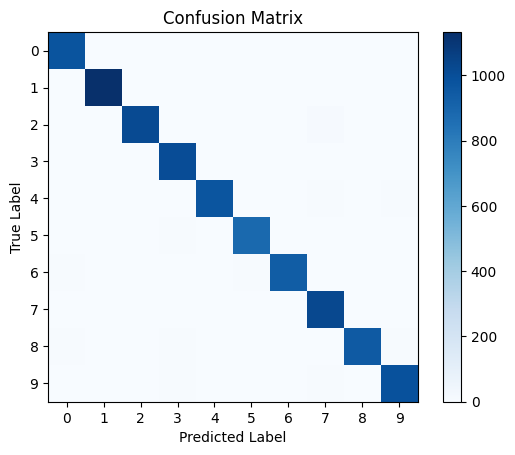

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='/content/drive/MyDrive/Datasets/spider/Test', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/Datasets/spider/Test', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ZeroShotCNN(input_dim=1, num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_acc = test(model, test_loader, criterion, device)

    # Generate the confusion matrix
    model.eval()
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Convert the lists to numpy arrays
    predicted_labels = np.array(predicted_labels)
    true_labels = np.array(true_labels)

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    print('Epoch: {} | Train Loss: {:.4f} | Test Acc: {:.4f}'.format(epoch+1, train_loss, test_acc))

    # Plot the confusion matrix
    plt.imshow(confusion_mat, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.show()

In [ ]:
from sklearn.metrics import f1_score


y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
y_pred = [0, 0, 1, 0, 1, 1, 1, 0, 1, 1]

# Calculate the F1 score
f1 = f1_score(y_true, y_pred)

print(f"F1 Score: {f1}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt




confusion_matrix = np.array([[50, 5, 0],
                             [3, 45, 2],
                             [0, 1, 48]])


class_labels = ['Urdu Handwritten Digits',  'Urdu Handwritten chracters', 'Single Chracter']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))


cax = ax.matshow(confusion_matrix, cmap='Greens')


fig.colorbar(cax)

# Set labels for axes
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)


for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='black')


ax.set_xlabel('Detected')
ax.set_ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

recall_score = 0.75

fig = plt.figure()

# Add 3D Axes
ax = fig.add_subplot(111, projection='3d')

# Define the position of the bar
xpos = 1
ypos = 1

# Define the height of the bar
zpos = 0
dx = dy = 0.1
dz = recall_score

# Create the 3D bar
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='red')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Recall Score')

# Set title
plt.title('Recall Score')

# Show the plot
plt.show()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

f1_score = 88.6


fig = plt.figure()

# Add 3D Axes
ax = fig.add_subplot(111, projection='3d')

# Define the position of the bar
xpos = 1
ypos = 1

# Define the height of the bar
zpos = 0
dx = dy = 0.1
dz = f1_score / 100  # Convert percentage to a decimal value

# Create the 3D bar
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F1 Score')

# Set title
plt.title('F1 Score')

# Show the plot
plt.show()


In [ ]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the uploaded image in color
image_path = '/content/drive/MyDrive/Datasets/spider/Train/spid (1).JPG'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')

# Generate a heatmap
sns.heatmap(image[:, :, 0], cmap='viridis', ax=ax2, cbar=False)
ax2.set_title('Heatmap')

for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_yticks([])

# Show the figure
plt.tight_layout()
plt.show()
